# Talent Squad III
## Data Science
Juan Sirai

<img src="https://elearning.uq.edu.au/files/96561/exam-info-banner.jpg">

----------------------------------------------------------------------------

## Influences on Academic Performance

A study has been carried out to see if the academic performance of children is influenced by the academic level of their parents. Therefore, the academic results of the students will be evaluated based on several variables

## Features

* gender: Student's sex
* parental level of education: Educational level of the father
* lunch: If you have dining scholarships
* test preparation course: Attend academy
* math score: Math score
* reading score: Reading Comprehension
* writing score: Writing score

## Task

In this challenge you will have to predict if the student's academic results are influenced by the educational level of the parents. These have a number that represents the following educational level:
* high school: 0,
* some high school: 1,
* some college: 2,
* associate's degree: 3,
* bachelor's degree: 4,
* master's degree: 5

------------------------------------------------------------------------

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import f_oneway

sns.set(style="ticks")
plt.style.use("dark_background")

# EDA

In [2]:
df = pd.read_csv('Data/train.csv')

In [3]:
df.head(2)

,Unnamed: 0,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,764,female,1,standard,none,62,76,67
1,866,male,4,standard,none,79,57,58


In [101]:
df.isnull().sum()

Unnamed: 0                     0
gender                         0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
average_score                  0
dtype: int64

In [4]:
df['average_score'] = (df['math score'] + df['reading score'] + df['writing score'] )/ 3

## a) Scores Distribution

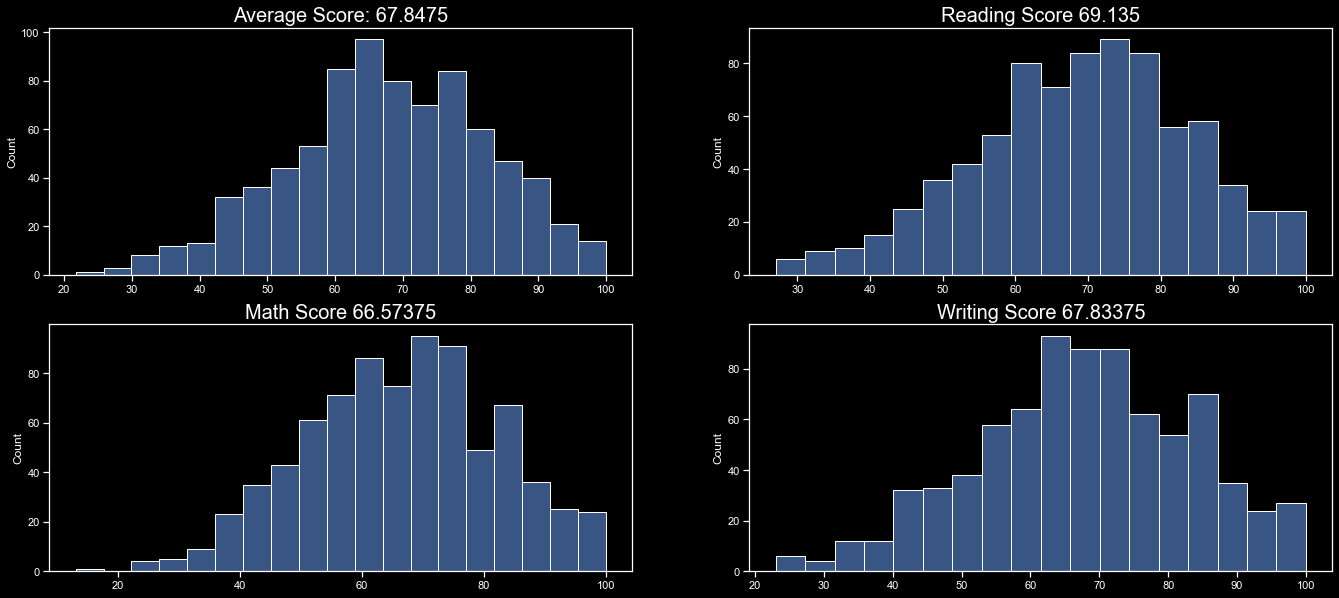

In [8]:
fig, axis=plt.subplots(2,2,figsize=(23,10))

axis[0,0].set_title(f"Average Score: {df['average_score'].mean()}", size=20)
b1 = sns.histplot(x=df['average_score'], ax = axis[0,0]).set(xlabel=None)


axis[1,0].set_title(f"Math Score {df['math score'].mean()}", size=20)
b1 = sns.histplot(x=df['math score'], ax = axis[1,0]).set(xlabel=None)

axis[0,1].set_title(f"Reading Score {df['reading score'].mean()}", size=20)
b1 = sns.histplot(x=df['reading score'], ax = axis[0,1]).set(xlabel=None)

axis[1,1].set_title(f"Writing Score {df['writing score'].mean()}", size=20)
b1 = sns.histplot(x=df['writing score'], ax = axis[1,1]).set(xlabel=None)



## b) Parental Education Distribution

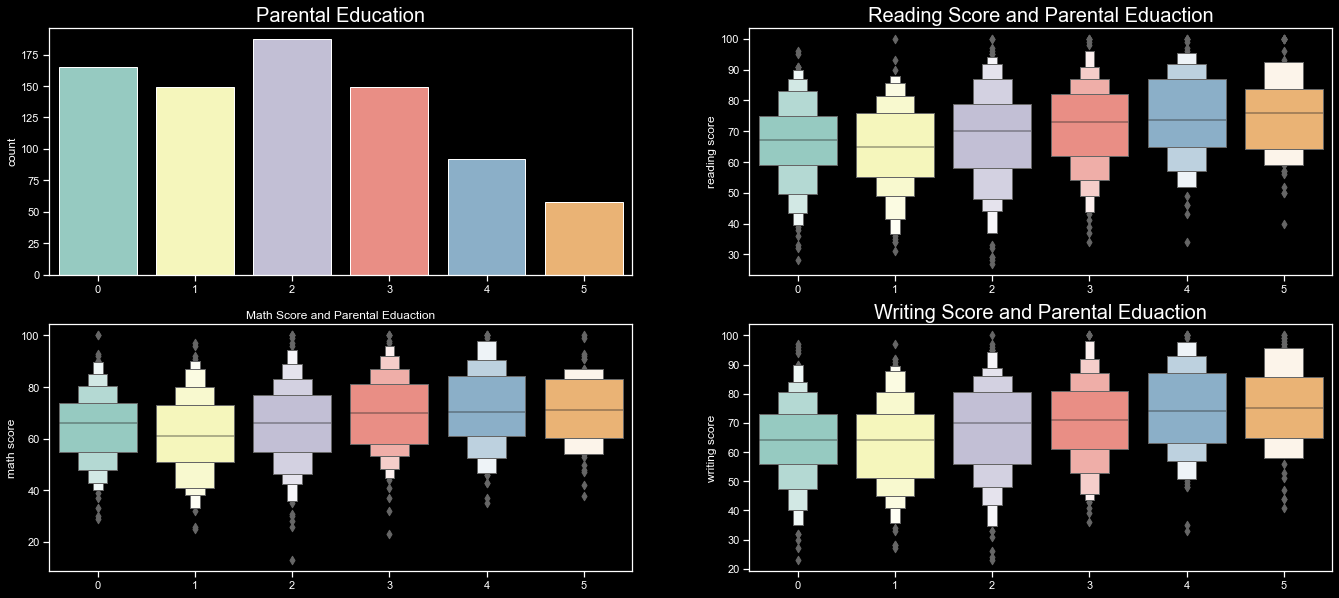

In [11]:
fig, axis=plt.subplots(2,2,figsize=(23,10))

axis[0,0].set_title("Parental Education", size=20)
b1 = sns.countplot(x=df['parental level of education'], ax = axis[0,0]).set(xlabel=None)


axis[1,0].set_title(f"Math Score and Parental Eduaction")
b1 = sns.boxenplot(x=df['parental level of education'],y=df['math score'], ax = axis[1,0]).set(xlabel=None)

axis[0,1].set_title(f"Reading Score and Parental Eduaction", size=20)
b1 = sns.boxenplot(x=df['parental level of education'],y=df['reading score'], ax = axis[0,1]).set(xlabel=None)

axis[1,1].set_title(f"Writing Score and Parental Eduaction", size=20)
b1 = sns.boxenplot(x=df['parental level of education'],y=df['writing score'], ax = axis[1,1]).set(xlabel=None)

## c) Correlation Matrix

<AxesSubplot:>

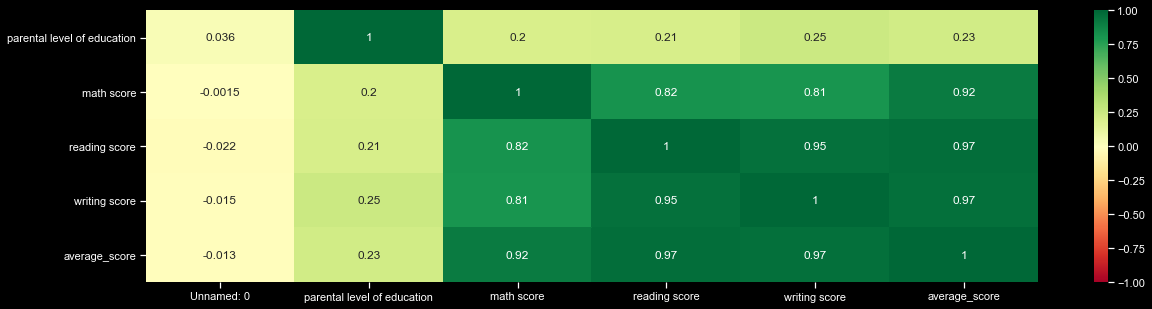

In [20]:
plt.figure(figsize=(20,5))
sns.heatmap(df.corr().drop('Unnamed: 0'), annot=True, vmin=-1, vmax=1, cmap="RdYlGn")

## d) Average Score and Other features

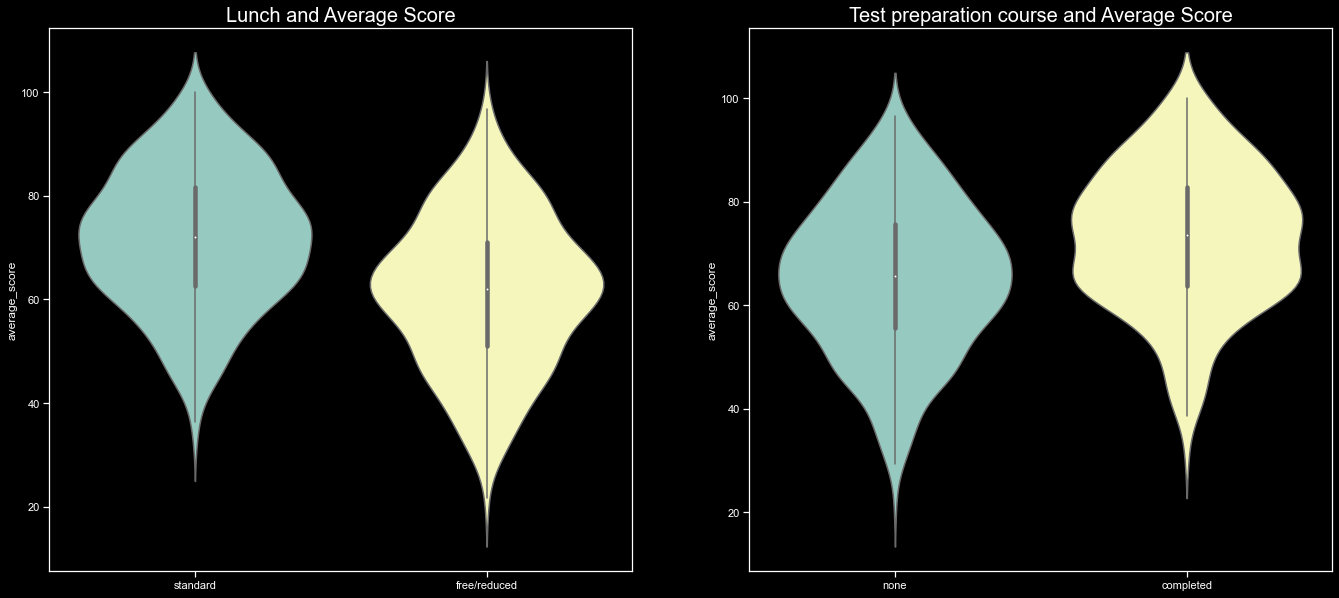

In [35]:
fig, axis=plt.subplots(1,2,figsize=(23,10))

axis[0].set_title("Lunch and Average Score", size=20)
b1 = sns.violinplot(x=df['lunch'],y=df['average_score'] ,ax = axis[0]).set(xlabel=None)


axis[1].set_title(f"Test preparation course and Average Score",size=20)
b1 = sns.violinplot(x=df['test preparation course'],y=df['average_score'], ax = axis[1]).set(xlabel=None)


--------------------------------------------------------------------------------------------------------------------

# ANOVA test

One-Way ANOVA in Python: One-way ANOVA (also known as “analysis of variance”) is a test that is used to find out whether there exists a statistically significant difference between the mean values of more than one group.

Hypothesis involved:
A one-way ANOVA has the below given null and alternative hypotheses:

H0 (null hypothesis): μ1 = μ2 = μ3 = … = μk (It implies that the means of all the population are equal)
H1 (null hypothesis): It states that there will be at least one population mean that differs from the rest

**In this particular case, we are going to evaluate if there are significant differences between the average score means of each "parental education" group.**

### Step 1: Creating data groups.


In [96]:
# Since our groups are not equally distributed, we will keep a sample of each one, equals to quantity of observations for group5 (58)

group_1=df.loc[df['parental level of education']==1,'average_score'].values[:58]
group_2=df.loc[df['parental level of education']==2,'average_score'].values[:58]
group_3=df.loc[df['parental level of education']==3,'average_score'].values[:58]
group_4=df.loc[df['parental level of education']==4,'average_score'].values[:58]
group_5=df.loc[df['parental level of education']==5,'average_score'].values

In [97]:
len(group_1)

58

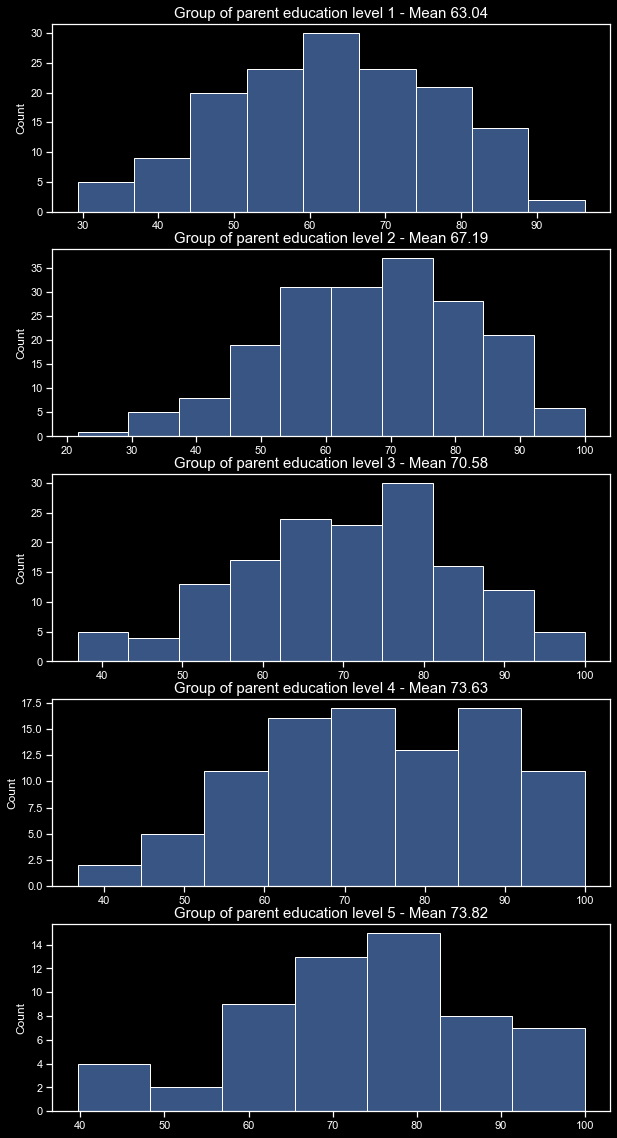

In [98]:
fig, axis=plt.subplots(5,1,figsize=(10,20))
for i in range(1,6):
    axis[i-1].set_title(f"Group of parent education level {i} - Mean {df.loc[df['parental level of education']==i,'average_score'].mean().round(2)}", size=15)
    b1 = sns.histplot(df.loc[df['parental level of education']==i,'average_score'].values ,ax = axis[i-1]).set(xlabel=None)

### Step 2: Conduct the one-way ANOVA

In [99]:
statistics = f_oneway(group_1, group_2, group_3, group_4, group_5)[0].round(3)
pvalue=statistic = f_oneway(group_1, group_2, group_3, group_4, group_5)[1].round(3)

In [100]:
print(f"The F statistic and p-value turn out to be equal to {statistics} and {pvalue} respectively. Since the p-value is less than 0.05 hence we would reject the null hypothesis. This implies that we have sufficient proof to say that there exists a difference in the performance of students, depends of parental education level") 

The F statistic and p-value turn out to be equal to 5.171 and 0.0 respectively. Since the p-value is less than 0.05 hence we would reject the null hypothesis. This implies that we have sufficient proof to say that there exists a difference in the performance of students, depends of parental education level


-------------------------

# Conclussion